In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.markers
import os 
os.chdir(os.path.dirname(os.getcwd()))
import pandas as pd
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
#style.use('ggplot')
import seaborn as sns
sns.set('talk')
sns.set_style("ticks")
sns.set_color_codes()
%matplotlib inline
import matplotlib.pylab as pylab



# DDPG

In [2]:
rewards = pkl.load(open('data/output/DDPG/DDPG_dynamic_True_noise_False_rewards_dqn.pkl', "rb"))

In [3]:
rewards[-1]

-4754540.398706114

Text(0.5, 0, 'Episode')

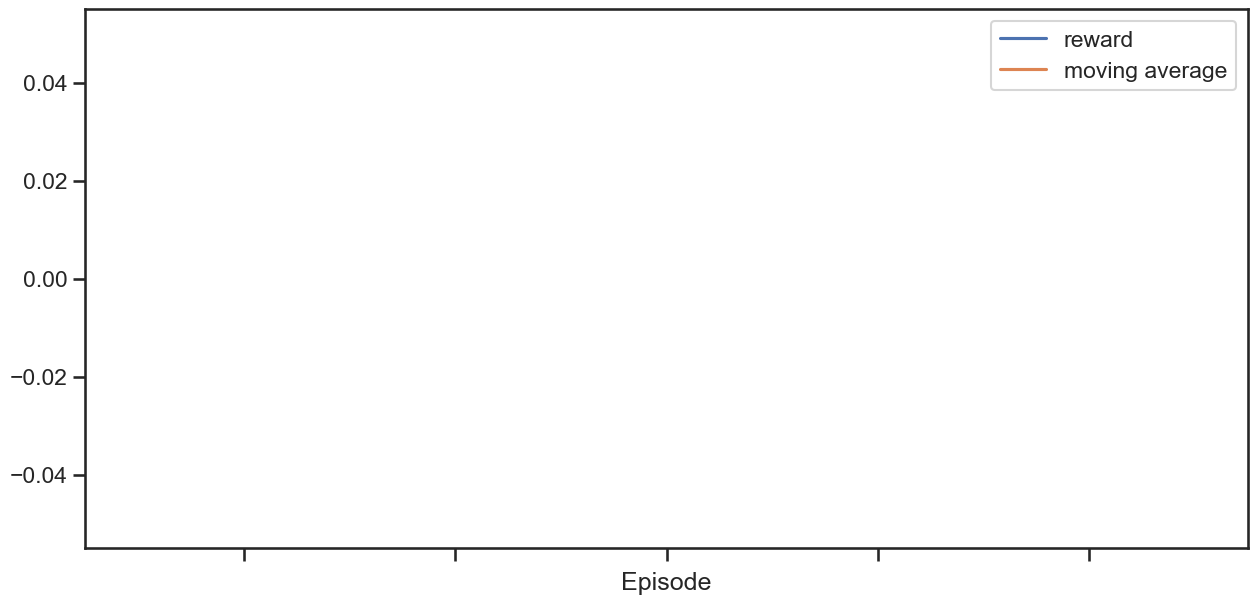

In [4]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]
r = rewards_df.fillna(rewards_df.mean())
moving_avg = r.rolling(window=10).mean()
moving_avg = moving_avg.rename(columns={'reward':'moving average'})
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')
#plt.savefig('data/output/rewards_dynamic_dqn.png')

In [5]:
eval_data = pkl.load(open('data/output/DDPG/DDPG_eval.pkl', 'rb'))

In [6]:
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']

In [7]:
rewards = pkl.load(open('data/output/DDPG/DDPG_dynamic_True_rewards_dqn.pkl', "rb"))

In [8]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [9]:
r = rewards_df.fillna(rewards_df.mean())

In [10]:
moving_avg = r.rolling(window=10).mean()

In [11]:
moving_avg = moving_avg.rename(columns={'reward':'moving average'})

## Evaluation

In [12]:
eval_data = pkl.load(open('data/output/DDPG/DDPG_eval.pkl', 'rb'))

In [13]:
eval_data

,PV Generation,Datetime,Gas Consumption,Prices,Prices Natural gas,Moles,Electrolyzer,Battery Action,Actions,Rewards,Temperatur,Storage,Power,Sun Power,Hydrogen,Wind Power,Natural Gas
0,0.0,2019-05-01 02:00:00,0.000000,55.00,2.59,1.000000e+01,0,0,"[0, 0]",0.000000,13.71,0,0.000000,0.0,0.000000,1.72,0.000000
1,0.0,2019-05-01 03:00:00,96711.222721,55.00,2.59,7.955045e+01,-0.9999223,0.03273902,"[0.03273902, -0.9999223]",-920.169781,12.76,10,0.654790,0.0,0.069550,1.66,9668.446752
2,0.0,2019-05-01 04:00:00,108504.672604,55.00,2.59,2.600187e+03,-0.9997026,0.05329959,"[0.05329959, -0.9997026]",-1040.358786,12.02,10,1.065992,0.0,2.600187,1.59,10763.015160
3,0.0,2019-05-01 05:00:00,118502.066234,53.00,2.59,1.314059e+04,-0.99860555,0.08435273,"[0.08435273, -0.99860555]",-1119.612485,11.42,10,1.687055,0.0,13.140588,1.45,11408.249230
4,0.0,2019-05-01 06:00:00,127109.109690,53.00,2.59,2.215124e+04,-0.99713486,0.10614034,"[0.10614034, -0.99713486]",-1184.696398,11.53,10,2.122807,2697000.0,22.151236,1.17,11965.898440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,0.0,2020-04-30 21:00:00,93577.242056,10.40,1.63,2.962299e+06,-0.99999994,0.99837446,"[0.99837446, -0.99999994]",152.464765,13.09,10,19.967489,0.0,360.126653,2.21,0.000000
8780,0.0,2020-04-30 22:00:00,104273.558437,12.04,1.63,3.044386e+06,-1.0,0.9989115,"[0.9989115, -1.0]",119.779774,11.97,10,19.978230,0.0,360.317664,2.00,0.000000
8781,0.0,2020-04-30 23:00:00,119202.487363,5.50,1.63,3.095011e+06,-0.99999344,0.99986935,"[0.99986935, -0.99999344]",250.672687,11.14,10,19.997387,0.0,360.658315,2.00,0.000000
8782,0.0,2020-05-01 00:00:00,131273.098739,5.35,1.69,3.101267e+06,-0.9999871,0.9999218,"[0.9999218, -0.9999871]",253.685336,10.57,10,19.998436,0.0,360.676968,1.93,0.000000


In [14]:
#eval_data['Sun Power'] = eval_data_sun['Sun Power']/3

In [15]:
eval_data['Date'] = pd.date_range(start='2019-05-01',end='2020-04-30', periods=len(eval_data))
eval_data.index = eval_data['Date']

In [16]:


costs_ddpg = sum(eval_data['Prices']*eval_data['Power'])
costs_gas = sum(eval_data['Natural Gas'])

produced_hydrogen = sum(eval_data['Hydrogen'])
sum_cost = costs_gas + costs_ddpg

d = {
    'col1': [1],
    'Earnings from grid': "$ {:0,.2f}".format(costs_ddpg), 
    'Cost Gas': "$ {:0,.2f}".format(costs_gas),
    'Hydrogen Produced': "{:0,.2f} kg/H2".format(produced_hydrogen),
    'Sum': "$ {:0,.2f}".format(sum_cost)
}
df = pd.DataFrame(data=d)
df

,col1,Earnings from grid,Cost Gas,Hydrogen Produced,Sum
0,1,"$ -1,238,176.64","$ 12,394,742.19","2,380,327.16 kg/H2","$ 11,156,565.54"


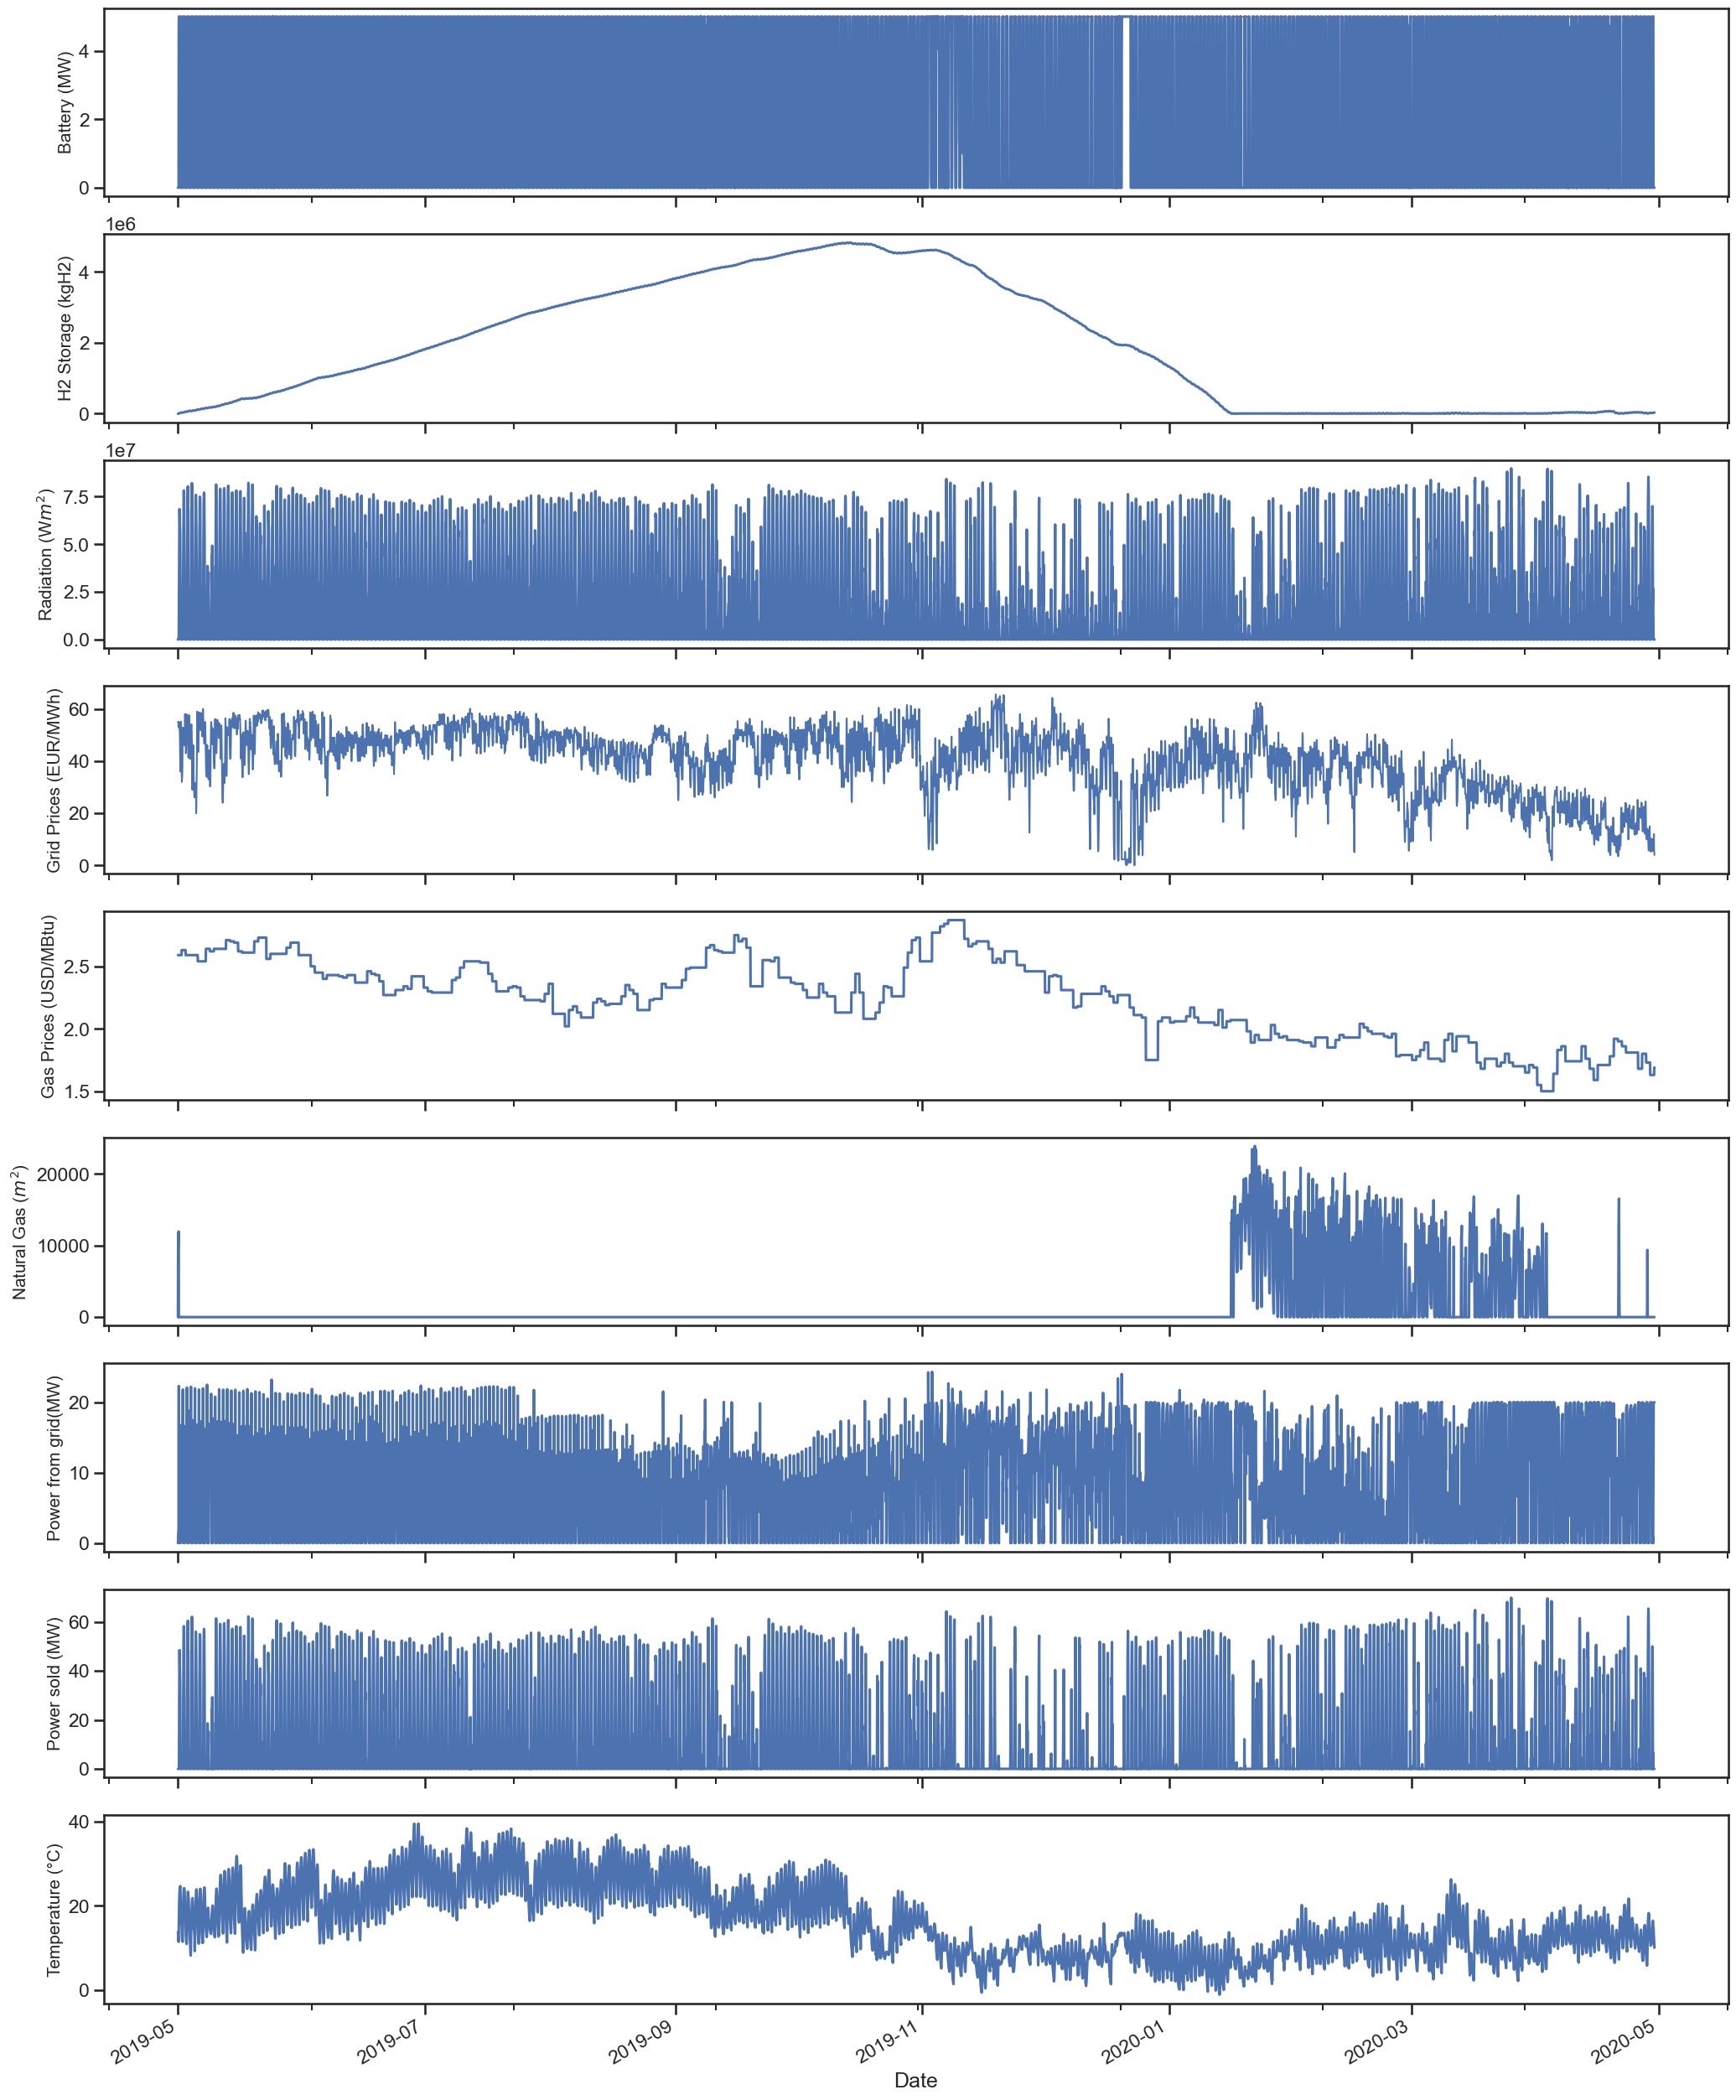

In [17]:
f, axs = plt.subplots(9,figsize=(25,35), sharex=True) #nrows=1, ncols=2,
one_week = eval_data.iloc[:]

one_week['Max Storage Capacity'] = 5000000*1e-6
one_week['Max Storage Capacity'].plot(ax=axs[0],c='r', linestyle = 'dashed', linewidth=1.5)
one_week['Storage_mw'] = one_week['Storage']*1e-6
one_week['Storage_mw'].plot(ax=axs[0], legend=False)
axs[0].set_ylabel('Battery (MW)', fontsize='small')
#axs[0].set_title('Battery')

one_week['Moles'] = one_week['Moles']*0.0101
one_week['Moles'].plot(ax=axs[1], legend=False)
axs[1].set_ylabel('H2 Storage (kgH2)', fontsize='small')
#axs[1].set_title('H2 Storage')

one_week['PV Generation'].plot(ax=axs[2], legend=False)
axs[2].set_ylabel('Radiation (W$m^2$) ', fontsize='small')
#axs[2].set_title('Sun Power')

one_week['Prices'].plot(ax=axs[3], linewidth=1.5)
axs[3].set_ylabel('Grid Prices (EUR/MWh)', fontsize='small')

one_week['Prices Natural gas'].plot(ax=axs[4], legend=False)
#axs[5].set_title('Natural Gas')
axs[4].set_ylabel('Gas Prices (USD/MBtu)', fontsize='small')

one_week['Natural Gas'].plot(ax=axs[5], legend=False)
#axs[5].set_title('Natural Gas')
axs[5].set_ylabel('Natural Gas ($m^2$)', fontsize='small')

one_week['Power sold(W)'] = eval_data['Power']
one_week['Power sold(W)'] = np.maximum(0, one_week['Power sold(W)'])
one_week['Power sold(W)'].plot(ax=axs[6], legend=False)
#axs[6].set_title('Power from grid')
axs[6].set_ylabel('Power from grid(MW)', fontsize='small')

one_week['Power sold (MW)'] = eval_data['Power']
one_week['Power sold (MW)'] = abs(np.minimum(0, one_week['Power sold (MW)']))
one_week['Power sold (MW)'].plot(ax=axs[7], legend=False)
#axs[7].set_title('Power sold (MW)')
axs[7].set_ylabel('Power sold (MW)', fontsize='small')

one_week['Temperatur'].plot(ax=axs[8], legend=False)
#axs[8].set_title('Temperature (°C)')
axs[8].set_ylabel('Temperature (°C)', fontsize='small')


plt.subplots_adjust(hspace=0.2)
plt.savefig('data/output/DDPG/images/simulation_result.jpg',  dpi=400, bbox_inches='tight')


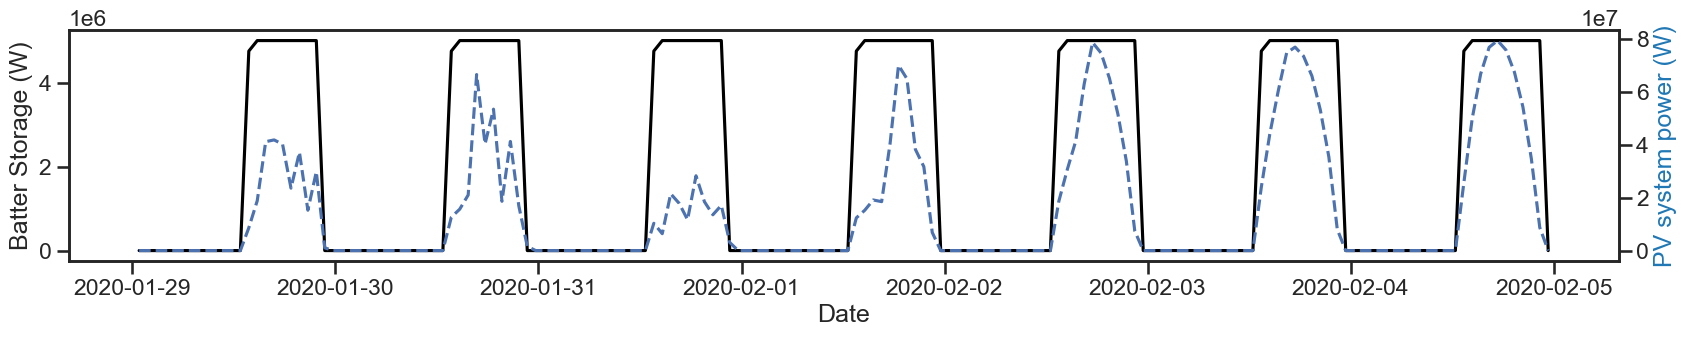

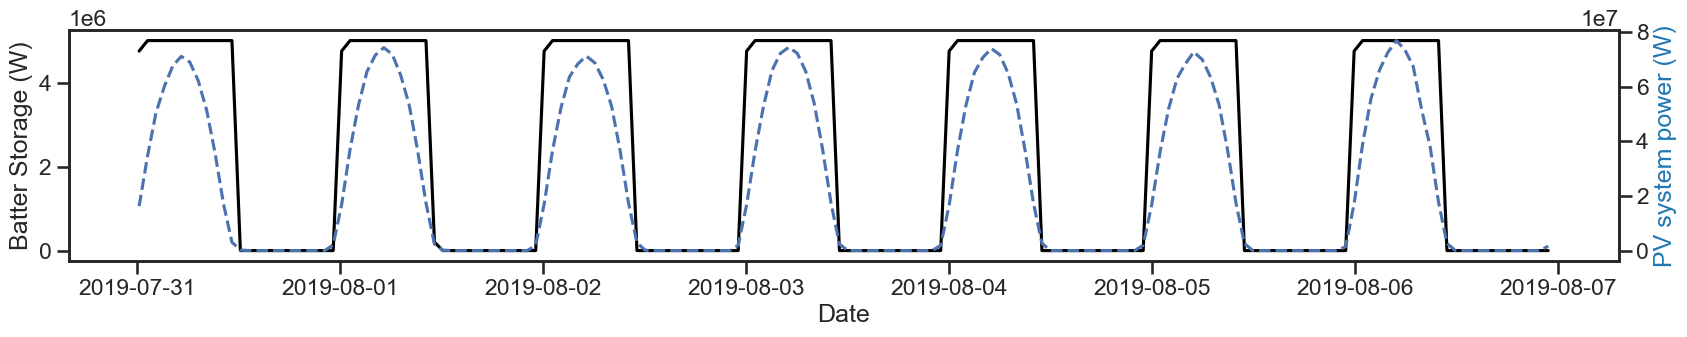

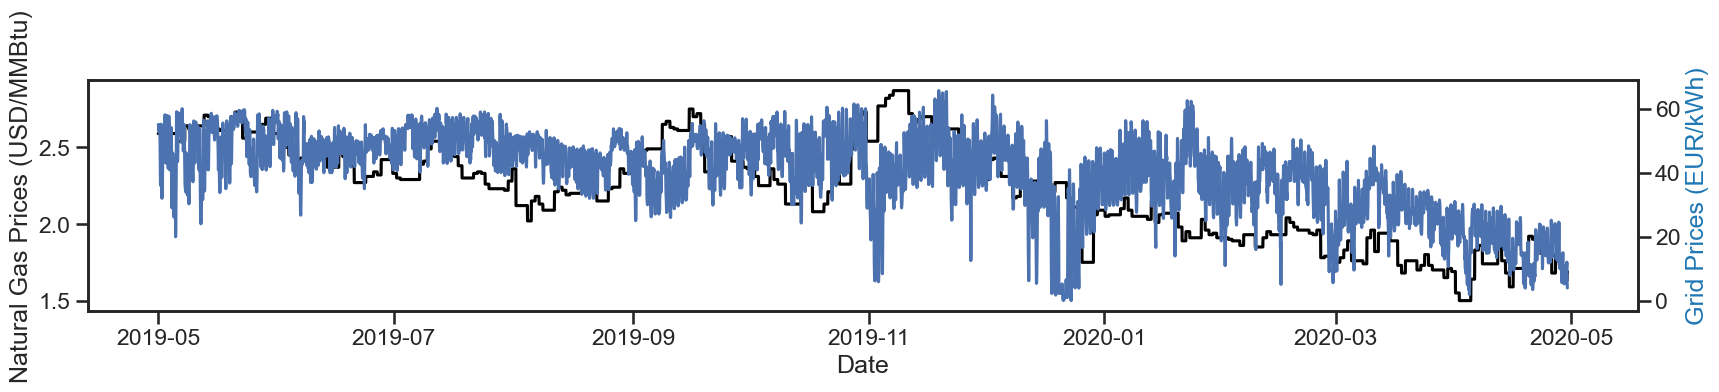

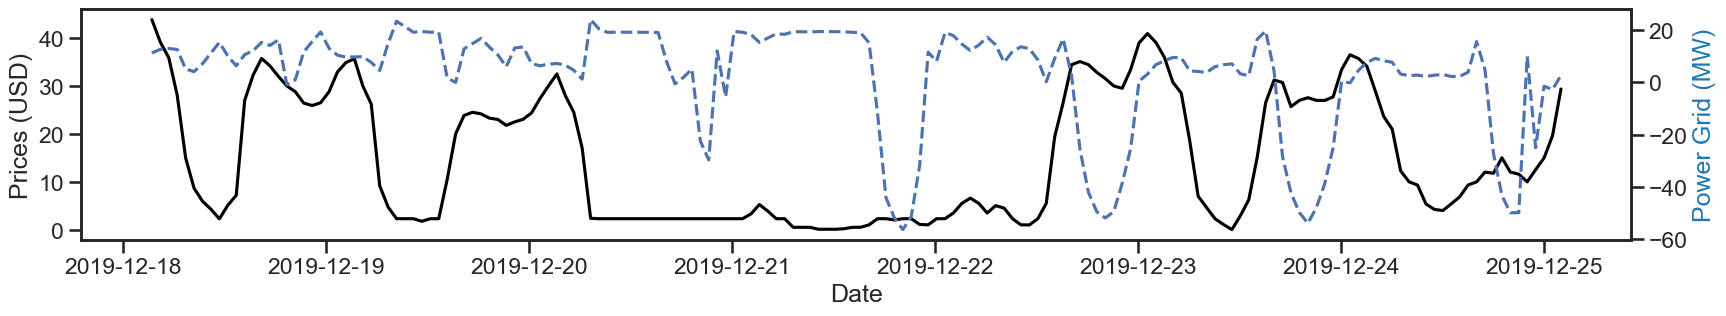

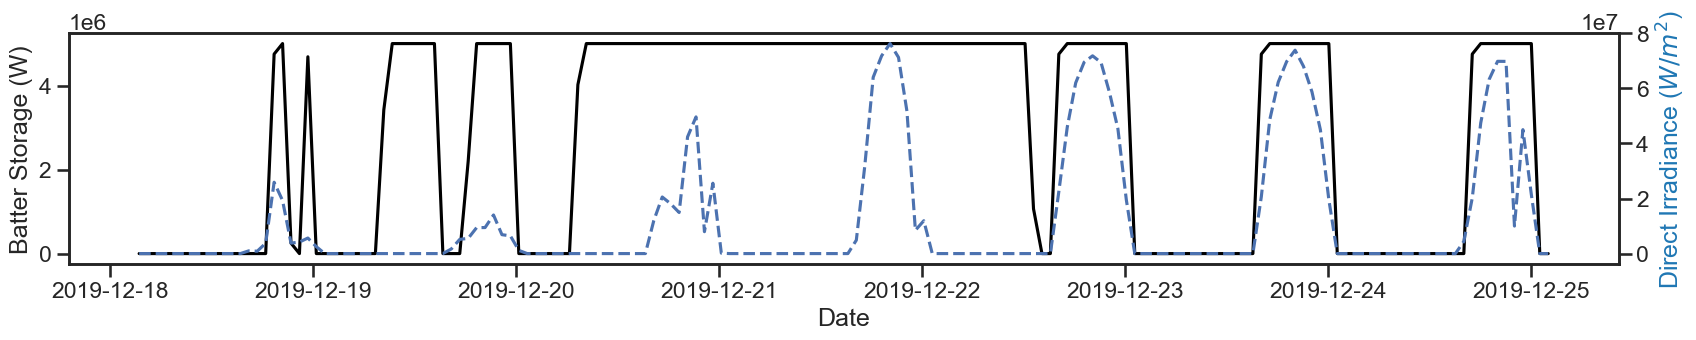

In [18]:
plot_data = eval_data.iloc[0+2190*3:7*24+2190*3]
plot_data2 = eval_data.iloc[0+2190:7*24+2190]
plot_data3 = eval_data.iloc[0+2190*3:7*24+2190*3]
plot_data4 = eval_data.iloc[0+2190*3-42*24:7*24+2190*3-42*24]


fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(plot_data['Storage'], color='0', label = 'Battery Storage')
ax.set_xlabel("Date")
ax.set_ylabel("Batter Storage (W)")

ax2=ax.twinx()
ax2.plot(plot_data['PV Generation'], linestyle='dashed', label = 'PV Generation')
ax2.set_ylabel("PV system power (W)", color='tab:blue')

plt.savefig('data/output/DDPG/images/Battery_Radiation_aug21.jpg',  dpi=400, bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(plot_data2['Storage'], color='0', label = 'Battery Storage')
ax.set_xlabel("Date")
ax.set_ylabel("Batter Storage (W)")

ax2=ax.twinx()
ax2.plot(plot_data2['PV Generation'], linestyle='dashed', label = 'PV Generation')
ax2.set_ylabel("PV system power (W)", color='tab:blue')
plt.savefig('data/output/DDPG/images/Battery_Radiation_feb21.jpg',  dpi=400, bbox_inches='tight')

plt.show()

fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(eval_data['Prices Natural gas'], color='0', label = 'Grid Prices')
ax.set_xlabel("Date")
ax.set_ylabel("Natural Gas Prices (USD/MMBtu)")

ax3=ax.twinx()
ax3.plot(eval_data['Prices'], label = 'Power from Grid')
ax3.set_ylabel("Grid Prices (EUR/kWh)", color='tab:blue')
plt.savefig('data/output/DDPG/images/prices_grid.jpg',  dpi=400, bbox_inches='tight')
plt.show()


fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(plot_data4['Prices'], color='0', label = 'Grid Prices')
ax.set_xlabel("Date")
ax.set_ylabel("Prices (USD)")

ax2=ax.twinx()
ax2.plot(plot_data4['Power'], linestyle='dashed', label = 'Power from Grid')
ax2.set_ylabel("Power Grid (MW)", color='tab:blue')
plt.savefig('data/output/DDPG/images/prices_grid_highlighted.jpg',  dpi=400, bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(plot_data4['Storage'], color='0', label = 'Battery Storage')
ax.set_xlabel("Date")
ax.set_ylabel("Batter Storage (W)")

ax2=ax.twinx()
ax2.plot(plot_data4['PV Generation'], linestyle='dashed', label = 'PV Generation')
ax2.set_ylabel("Direct Irradiance ($W/m^2$)", color='tab:blue')

plt.savefig('data/output/DDPG/images/Battery_Radiation_highlighted.jpg',  dpi=400, bbox_inches='tight')
plt.show()



### Electrolyzer